In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# 画像を読み込む
# 'your_image_path.jpg' を実際の画像ファイルへのパスに置き換えてください。
# もし画像がカレントディレクトリにない場合は、絶対パスか相対パスを正しく指定してください。
img_path = 'image.png' # ← ここを画像のパスに変更
img = cv2.imread(img_path)

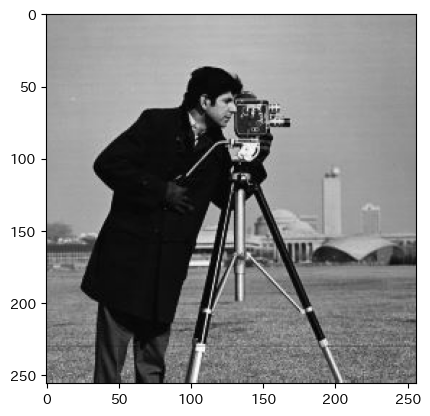

In [2]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

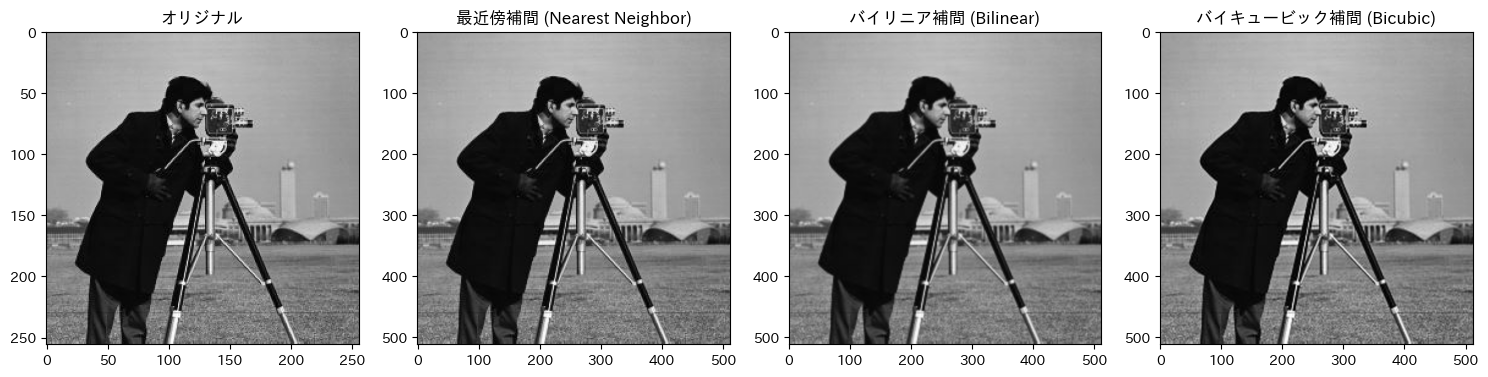

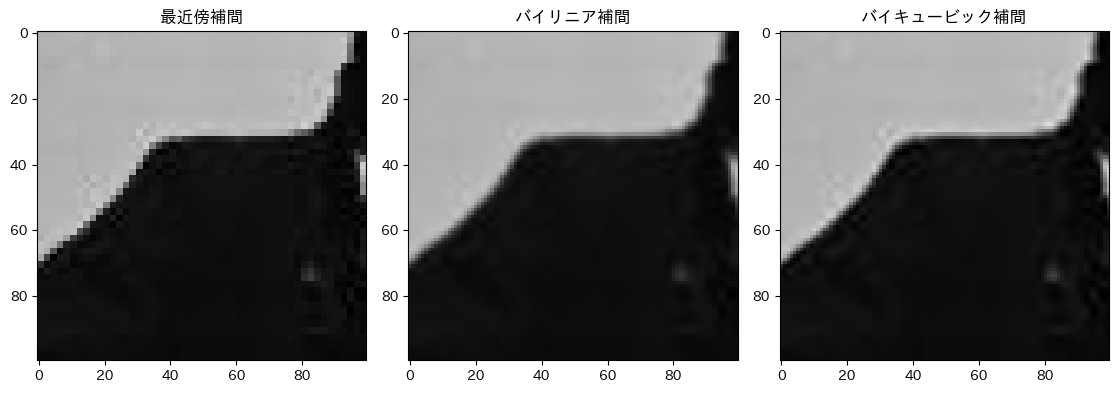

In [6]:
def resize_with_interpolation(image, scale=2.0):
    """
    異なる補間方法で画像を拡大する関数
    
    Parameters:
        image: 入力画像
        scale: 拡大倍率
    """
    height, width = image.shape[:2]
    new_height = int(height * scale)
    new_width = int(width * scale)
    
    # 異なる補間方法で拡大
    nearest = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
    bilinear = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    bicubic = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    
    return nearest, bilinear, bicubic

# 画像の拡大と比較表示
plt.figure(figsize=(15, 10))

# オリジナル画像
plt.subplot(141)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('オリジナル')

# 各補間方法での拡大結果
nearest, bilinear, bicubic = resize_with_interpolation(img, scale=2.0)

# 最近傍補間
plt.subplot(142)
plt.imshow(cv2.cvtColor(nearest, cv2.COLOR_BGR2RGB))
plt.title('最近傍補間 (Nearest Neighbor)')

# バイリニア補間
plt.subplot(143)
plt.imshow(cv2.cvtColor(bilinear, cv2.COLOR_BGR2RGB))
plt.title('バイリニア補間 (Bilinear)')

# バイキュービック補間
plt.subplot(144)
plt.imshow(cv2.cvtColor(bicubic, cv2.COLOR_BGR2RGB))
plt.title('バイキュービック補間 (Bicubic)')

plt.tight_layout()
plt.show()

# 拡大した部分を比較表示（より詳細に違いを確認するため）
def show_detail(images, titles, region=(100, 100, 200, 200)):
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles), 1):
        plt.subplot(1, 4, i)
        y1, x1, y2, x2 = region
        plt.imshow(cv2.cvtColor(img[y1:y2, x1:x2], cv2.COLOR_BGR2RGB))
        plt.title(title)
    plt.tight_layout()
    plt.show()

# 拡大部分の詳細比較
show_detail(
    [nearest, bilinear, bicubic],
    [ '最近傍補間', 'バイリニア補間', 'バイキュービック補間']
)